## Visualização dos dados - mapas

Nesse notebook são feitas as visualizações do dados em mapas

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from utils.load_csv import load_csv
from utils.load_shp import load_shp
from utils.save_graph import save_graph

In [2]:
df_ppa_reg = load_csv("ppa_reg.csv")

gdf_subprefs = load_shp("subprefs.shp")

#### Mapas

Tratamento +

In [3]:
df_grouped_mapas = df_ppa_reg.groupby("descricao prefeitura regional")[["valor 2022", "valor 2023", "valor 2024", "valor 2025"]].sum().reset_index()

In [4]:
gdf_mapa = gdf_subprefs.merge(df_grouped_mapas, 
                              how = "left", 
                              left_on = "nm_subpref", 
                              right_on = "descricao prefeitura regional")

In [5]:
max_abs = gdf_mapa[["valor 2022", "valor 2023", "valor 2024", "valor 2025"]].max().max()

max_abs

np.float64(2371020731.0)

Plots

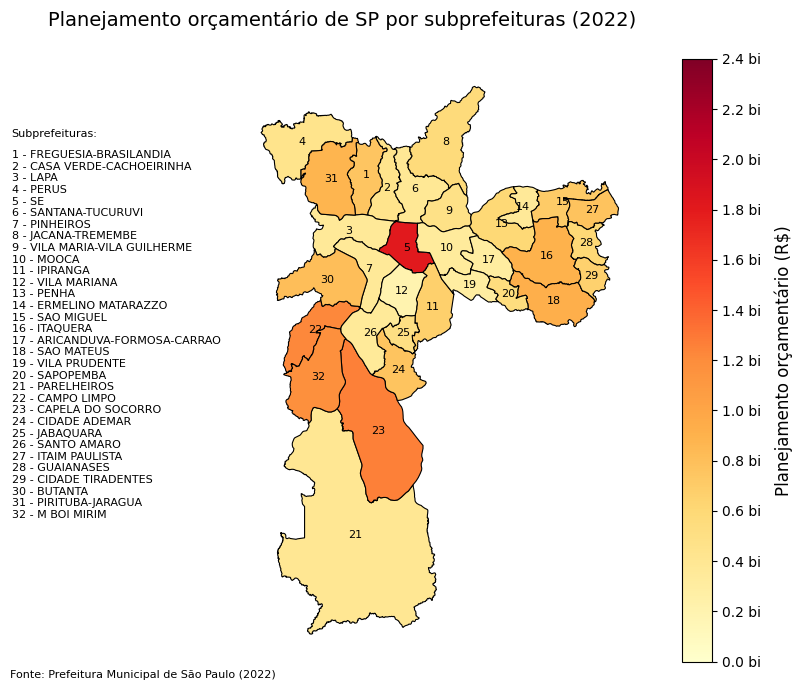

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

gdf_mapa.plot(column = "valor 2022",
              cmap = "YlOrRd",
              linewidth = 0.8,
              edgecolor = "black",
              legend = True,
              ax = ax,
              vmin = 0,
              vmax = 2.4e9)

plt.text(0.13, 0.95, 
         "Planejamento orçamentário de SP por subprefeituras (2022)",
         fontsize = 14, ha = "left", va = "center", transform = fig.transFigure)

colorbar = ax.get_figure().get_axes()[1]

ticks = np.arange(0, 2.5e9, 0.2e9)

colorbar.yaxis.set_ticks(ticks)

colorbar.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e9:.1f} bi'))

colorbar.set_ylabel("Planejamento orçamentário (R$)", fontsize = 12, labelpad = 10)

colorbar.set_ylim(0, 2.4e9)

for idx, row in gdf_mapa.iterrows():
    centroid = row["geometry"].centroid
    ax.text(centroid.x, centroid.y, str(idx + 1), 
            color = "black", fontsize = 8, ha = "center", va = "center")

tabela_subprefs = gdf_mapa.reset_index()[["index", "nm_subpref"]]

tabela_subprefs["index"] = tabela_subprefs["index"] + 1

tabela_subprefs = tabela_subprefs.sort_values("index")

tabela_texto = [f'{int(row["index"])} - {row["nm_subpref"]}' for _, row in tabela_subprefs.iterrows()]

tabela_str = "\n".join(tabela_texto)

plt.figtext(0.1, 0.78, "Subprefeituras:", fontsize = 8, ha = "left", va = "bottom")

plt.figtext(0.1, 0.5, tabela_str, fontsize = 8, ha = "left", va = "center")

pos = ax.get_position()

ax.set_position([pos.x0 - -0.37, pos.y0, pos.width, pos.height])

plt.figtext(0.32, 0.01, 
            "Fonte: Prefeitura Municipal de São Paulo (2022)", 
            ha = "right", fontsize = 8)

ax.axis("off")

plt.tight_layout()

plt.show()

save_graph(fig, "mapa_ppa_2022.png")

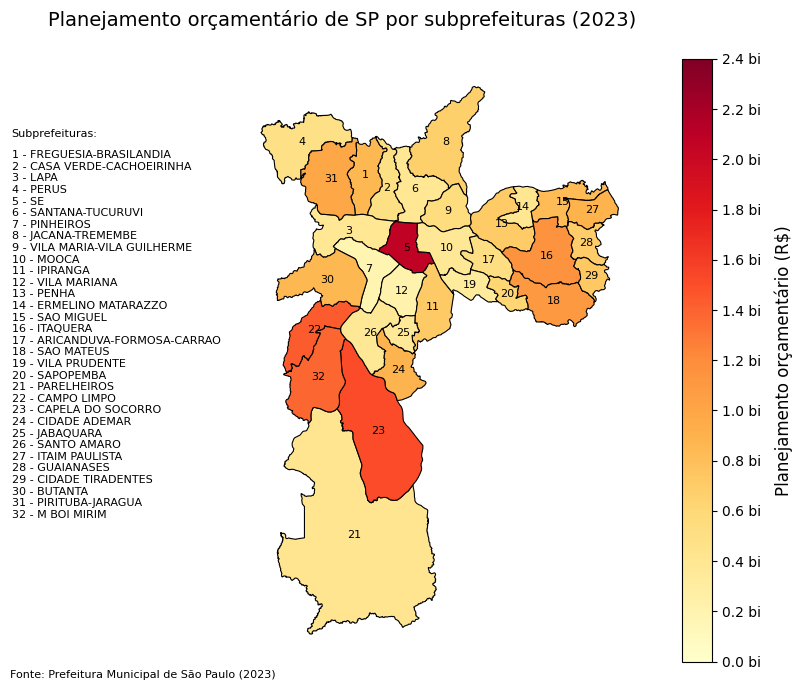

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

gdf_mapa.plot(column = "valor 2023",
              cmap = "YlOrRd",
              linewidth = 0.8,
              edgecolor = "black",
              legend = True,
              ax = ax,
              vmin = 0,
              vmax = 2.4e9)

plt.text(0.13, 0.95, 
         "Planejamento orçamentário de SP por subprefeituras (2023)",
         fontsize = 14, ha = "left", va = "center", transform = fig.transFigure)

colorbar = ax.get_figure().get_axes()[1]

ticks = np.arange(0, 2.5e9, 0.2e9)

colorbar.yaxis.set_ticks(ticks)

colorbar.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e9:.1f} bi'))

colorbar.set_ylabel("Planejamento orçamentário (R$)", fontsize = 12, labelpad = 10)

colorbar.set_ylim(0, 2.4e9)

for idx, row in gdf_mapa.iterrows():
    centroid = row["geometry"].centroid
    ax.text(centroid.x, centroid.y, str(idx + 1), 
            color = "black", fontsize = 8, ha = "center", va = "center")

tabela_subprefs = gdf_mapa.reset_index()[["index", "nm_subpref"]]

tabela_subprefs["index"] = tabela_subprefs["index"] + 1

tabela_subprefs = tabela_subprefs.sort_values("index")

tabela_texto = [f'{int(row["index"])} - {row["nm_subpref"]}' for _, row in tabela_subprefs.iterrows()]

tabela_str = "\n".join(tabela_texto)

plt.figtext(0.1, 0.78, "Subprefeituras:", fontsize = 8, ha = "left", va = "bottom")

plt.figtext(0.1, 0.5, tabela_str, fontsize = 8, ha = "left", va = "center")

pos = ax.get_position()

ax.set_position([pos.x0 - -0.37, pos.y0, pos.width, pos.height])

plt.figtext(0.32, 0.01, 
            "Fonte: Prefeitura Municipal de São Paulo (2023)", 
            ha = "right", fontsize = 8)

ax.axis("off")

plt.tight_layout()

plt.show()

save_graph(fig, "mapa_ppa_2023.png")

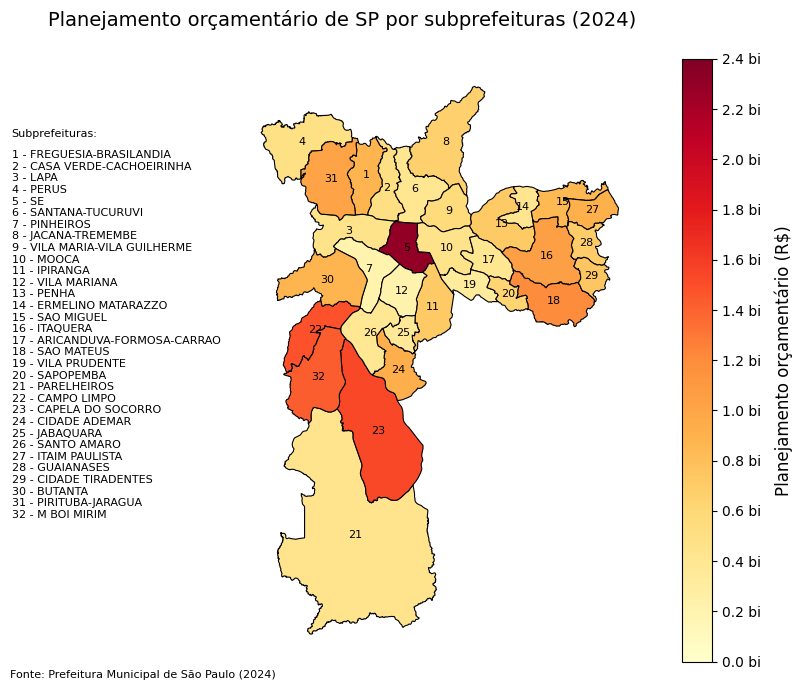

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

gdf_mapa.plot(column = "valor 2024",
              cmap = "YlOrRd",
              linewidth = 0.8,
              edgecolor = "black",
              legend = True,
              ax = ax,
              vmin = 0,
              vmax = 2.4e9)

plt.text(0.13, 0.95, 
         "Planejamento orçamentário de SP por subprefeituras (2024)",
         fontsize = 14, ha = "left", va = "center", transform = fig.transFigure)

colorbar = ax.get_figure().get_axes()[1]

ticks = np.arange(0, 2.5e9, 0.2e9)

colorbar.yaxis.set_ticks(ticks)

colorbar.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e9:.1f} bi'))

colorbar.set_ylabel("Planejamento orçamentário (R$)", fontsize = 12, labelpad = 10)

colorbar.set_ylim(0, 2.4e9)

for idx, row in gdf_mapa.iterrows():
    centroid = row["geometry"].centroid
    ax.text(centroid.x, centroid.y, str(idx + 1), 
            color = "black", fontsize = 8, ha = "center", va = "center")

tabela_subprefs = gdf_mapa.reset_index()[["index", "nm_subpref"]]

tabela_subprefs["index"] = tabela_subprefs["index"] + 1

tabela_subprefs = tabela_subprefs.sort_values("index")

tabela_texto = [f'{int(row["index"])} - {row["nm_subpref"]}' for _, row in tabela_subprefs.iterrows()]

tabela_str = "\n".join(tabela_texto)

plt.figtext(0.1, 0.78, "Subprefeituras:", fontsize = 8, ha = "left", va = "bottom")

plt.figtext(0.1, 0.5, tabela_str, fontsize = 8, ha = "left", va = "center")

pos = ax.get_position()

ax.set_position([pos.x0 - -0.37, pos.y0, pos.width, pos.height])

plt.figtext(0.32, 0.01, 
            "Fonte: Prefeitura Municipal de São Paulo (2024)", 
            ha = "right", fontsize = 8)

ax.axis("off")

plt.tight_layout()

plt.show()

save_graph(fig, "mapa_ppa_2024.png")

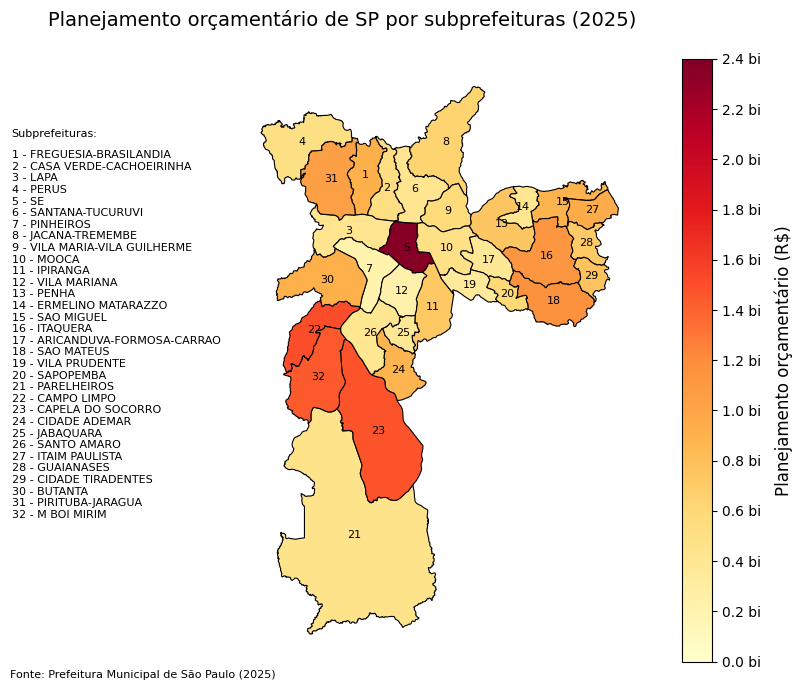

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

gdf_mapa.plot(column = "valor 2025",
              cmap = "YlOrRd",
              linewidth = 0.8,
              edgecolor = "black",
              legend = True,
              ax = ax,
              vmin = 0,
              vmax = 2.4e9)

plt.text(0.13, 0.95, 
         "Planejamento orçamentário de SP por subprefeituras (2025)",
         fontsize = 14, ha = "left", va = "center", transform = fig.transFigure)

colorbar = ax.get_figure().get_axes()[1]

ticks = np.arange(0, 2.5e9, 0.2e9)

colorbar.yaxis.set_ticks(ticks)

colorbar.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e9:.1f} bi'))

colorbar.set_ylabel("Planejamento orçamentário (R$)", fontsize = 12, labelpad = 10)

colorbar.set_ylim(0, 2.4e9)

for idx, row in gdf_mapa.iterrows():
    centroid = row["geometry"].centroid
    ax.text(centroid.x, centroid.y, str(idx + 1), 
            color = "black", fontsize = 8, ha = "center", va = "center")

tabela_subprefs = gdf_mapa.reset_index()[["index", "nm_subpref"]]

tabela_subprefs["index"] = tabela_subprefs["index"] + 1

tabela_subprefs = tabela_subprefs.sort_values("index")

tabela_texto = [f'{int(row["index"])} - {row["nm_subpref"]}' for _, row in tabela_subprefs.iterrows()]

tabela_str = "\n".join(tabela_texto)

plt.figtext(0.1, 0.78, "Subprefeituras:", fontsize = 8, ha = "left", va = "bottom")

plt.figtext(0.1, 0.5, tabela_str, fontsize = 8, ha = "left", va = "center")

pos = ax.get_position()

ax.set_position([pos.x0 - -0.37, pos.y0, pos.width, pos.height])

plt.figtext(0.32, 0.01, 
            "Fonte: Prefeitura Municipal de São Paulo (2025)", 
            ha = "right", fontsize = 8)

ax.axis("off")

plt.tight_layout()

plt.show()

save_graph(fig, "mapa_ppa_2025.png")

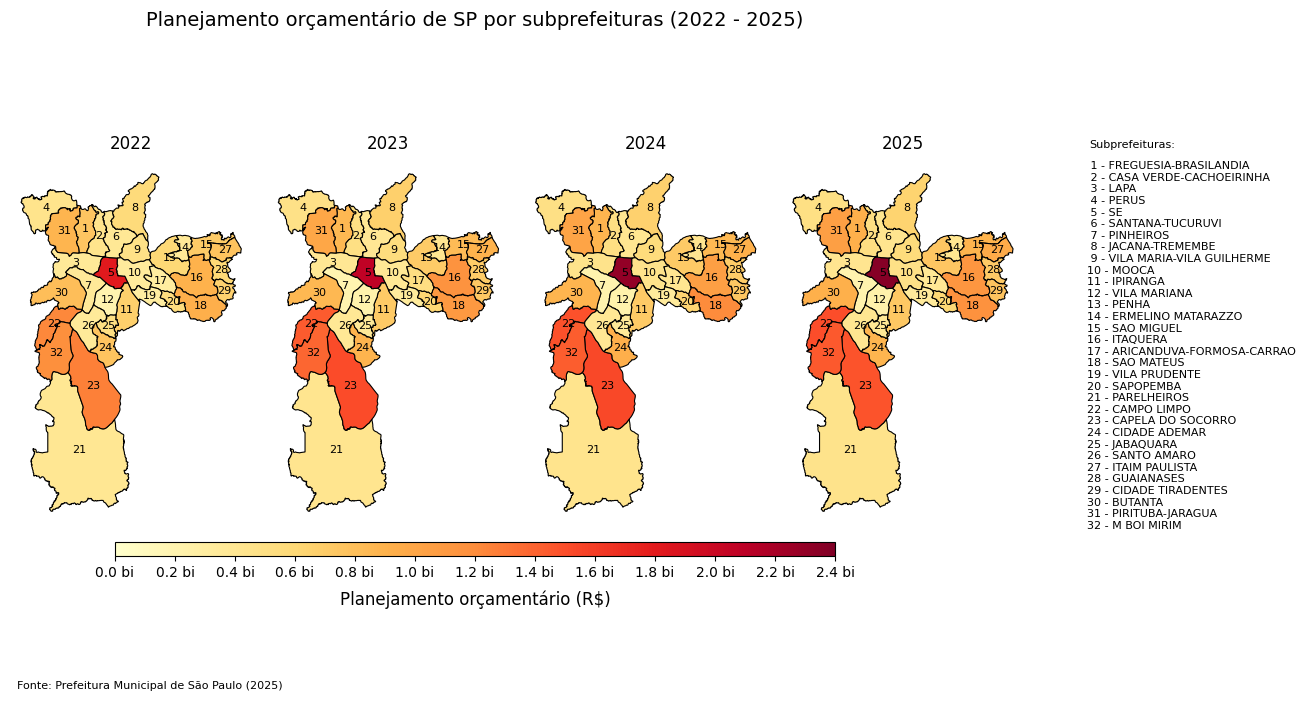

In [15]:
fig, axs = plt.subplots(1, 4, figsize=(12, 7))

anos = ["2022", "2023", "2024", "2025"]

colunas = ["valor 2022", "valor 2023", "valor 2024", "valor 2025"]

vmin, vmax = 0, 2.4e9

ticks = np.arange(0, 2.5e9, 0.2e9)

for i, ax in enumerate(axs.flat):
    
    col = colunas[i]

    ano = anos[i]

    gdf_mapa.plot(column = col,
                  cmap = "YlOrRd",
                  linewidth = 0.8,
                  edgecolor = "black",
                  ax = ax,
                  vmin = vmin,
                  vmax = vmax)

    for idx, row in gdf_mapa.iterrows():
        
        centroid = row["geometry"].centroid
        
        ax.text(centroid.x, centroid.y, str(idx + 1),
                color = "black", fontsize = 8, ha = "center", va = "center")

    ax.set_title(f"{ano}", fontsize = 12)

    ax.axis("off")

cbar_ax = fig.add_axes([0.13, 0.2, 0.6, 0.02])

sm = plt.cm.ScalarMappable(cmap = "YlOrRd", norm = plt.Normalize(vmin = vmin, vmax = vmax))

sm._A = []

cbar = fig.colorbar(sm, cax = cbar_ax, orientation = "horizontal")

cbar.set_label("Planejamento orçamentário (R$)", fontsize = 12, labelpad = 8)

cbar.set_ticks(ticks)

cbar.ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e9:.1f} bi'))

fig.suptitle("Planejamento orçamentário de SP por subprefeituras (2022 - 2025)",
             fontsize=14, y=0.98, x = 0.43)

tabela_subprefs = gdf_mapa.reset_index()[["index", "nm_subpref"]]

tabela_subprefs["index"] += 1

tabela_subprefs = tabela_subprefs.sort_values("index")

tabela_texto = [f'{int(row["index"]):2d} - {row["nm_subpref"]}' for _, row in tabela_subprefs.iterrows()]

tabela_str = "\n".join(tabela_texto)

plt.figtext(0.942, 0.78, "Subprefeituras:", fontsize = 8, ha = "left", va = "bottom")

fig.text(0.94, 0.5, tabela_str, fontsize = 8, ha = "left", va = "center")

fig.text(0.27, 0.01, 
         "Fonte: Prefeitura Municipal de São Paulo (2025)",
         ha ="right", fontsize = 8)

import warnings
warnings.filterwarnings("ignore", category = UserWarning)

plt.tight_layout(rect = [0.03, 0.13, 0.9, 0.93])

plt.show()

save_graph(fig, "mapa_ppa_juntos.png")